In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plot
from keras.utils import to_categorical
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train.shape[1]

28

In [5]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

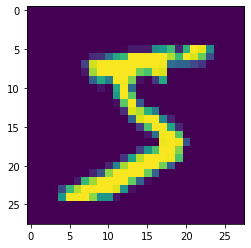

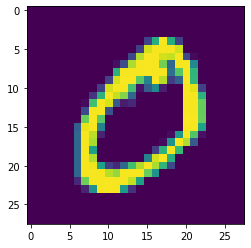

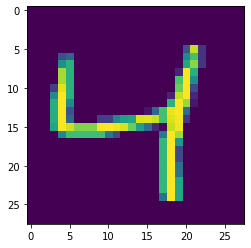

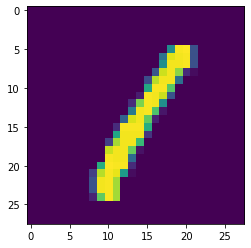

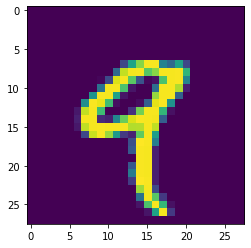

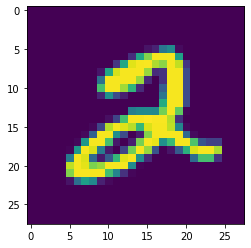

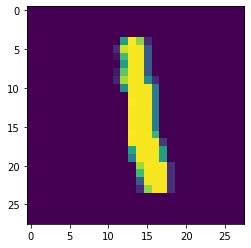

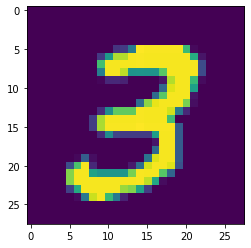

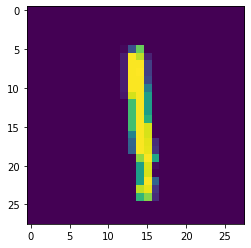

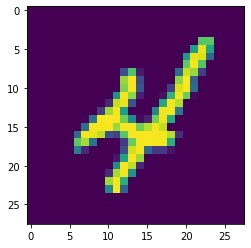

In [8]:
from matplotlib import pyplot as plt
for i in range(10):
    plt.imshow(x_train[i], interpolation='nearest')
    plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [10]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [15]:

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),filters=16, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, kernel_initializer='he_normal',activation='elu'))
model.add(BatchNormalization())
model.add(Dense(10,kernel_initializer='he_normal',activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5770      
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)               

In [17]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=10, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 13s - loss: 0.5729 - categorical_accuracy: 0.8289 - val_loss: 0.1616 - val_categorical_accuracy: 0.9509 - 13s/epoch - 3ms/step
Epoch 2/10
4200/4200 - 12s - loss: 0.2174 - categorical_accuracy: 0.9336 - val_loss: 0.1321 - val_categorical_accuracy: 0.9558 - 12s/epoch - 3ms/step
Epoch 3/10
4200/4200 - 13s - loss: 0.1822 - categorical_accuracy: 0.9441 - val_loss: 0.1140 - val_categorical_accuracy: 0.9638 - 13s/epoch - 3ms/step
Epoch 4/10
4200/4200 - 14s - loss: 0.1552 - categorical_accuracy: 0.9530 - val_loss: 0.0937 - val_categorical_accuracy: 0.9705 - 14s/epoch - 3ms/step
Epoch 5/10
4200/4200 - 15s - loss: 0.1487 - categorical_accuracy: 0.9546 - val_loss: 0.0974 - val_categorical_accuracy: 0.9701 - 15s/epoch - 3ms/step
Epoch 6/10
4200/4200 - 12s - loss: 0.1357 - categorical_accuracy: 0.9590 - val_loss: 0.0965 - val_categorical_accuracy: 0.9696 - 12s/epoch - 3ms/step
Epoch 7/10
4200/4200 - 12s - loss: 0.1293 - categorical_accuracy: 0.9609 - val_loss: 0.0957 - val_ca

In [18]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - categorical_accuracy: 0.9801


[0.06545696407556534, 0.9800833463668823]

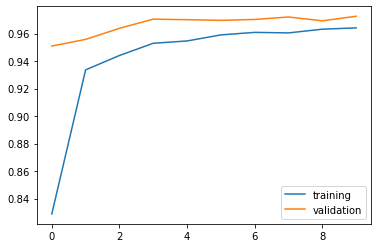

In [22]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['training', 'validation'])
plt.show()